<a href="https://colab.research.google.com/github/kais-ameur/Automatic-Building-and-Road-Extraction-from-Satellite-and-LiDAR/blob/main/0606Copy_of_Copie_de_Copie_de_Machine_learning_Performance_Moddeling_Kais_Ameur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importation de bibliothèques**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats
from matplotlib import style
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import chardet
#seaborn.set_style("white")
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


**I.1 Import de la Base de donnée Réseaux**

In [ ]:



with open('/content/drive/MyDrive/Datasets/Dataset_Network_10.csv', 'rb') as f:
      enc = chardet.detect(f.read())  # or readline if the file is large
    
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset_Network_10.csv', encoding = enc['encoding'], lineterminator='\n', sep=";")


#data = pd.read_csv("/content/drive/MyDrive/Datasets/DB_KPIs_2022.csv", sep :";")
data.head()

,Site,Sector,Gouvernorat,cell,Longitude,Latitude,HBA,Freq,Spectre_(Mhz),Azimut,Tilt,Puissance,MIMO,Cluster\r
0,4G_KELWAMEN,4G_KELWAMEN_O,KEBILI,LDZ003O,8.90353,33.593917,15.0,800,10,40.0,20,46,2T2R,0
1,4G_KELWAMEN,4G_KELWAMEN_P,KEBILI,LDZ003P,8.90353,33.593917,15.0,800,10,130.0,20,46,2T2R,0
2,4G_KELWAMEN,4G_KELWAMEN_Q,KEBILI,LDZ003Q,8.90353,33.593917,15.0,800,10,310.0,20,46,2T2R,0
3,4G_KELWAMEN,4G_KELWAMEN_X,KEBILI,LDZ003X,8.90353,33.593917,15.0,1800,20,40.0,40,46,2T2R,0
4,4G_KELWAMEN,4G_KELWAMEN_Y,KEBILI,LDZ003Y,8.90353,33.593917,15.0,1800,20,130.0,40,46,2T2R,0


**I.2 Exploration de la base de donnée Network**




In [ ]:
data.shape

(5326, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           5326 non-null   object 
 1   Sector         5326 non-null   object 
 2   Gouvernorat    5326 non-null   object 
 3   cell           5326 non-null   object 
 4   Longitude      5326 non-null   float64
 5   Latitude       5326 non-null   float64
 6   HBA            5326 non-null   float64
 7   Freq           5326 non-null   int64  
 8   Spectre_(Mhz)  5326 non-null   int64  
 9   Azimut         5320 non-null   float64
 10  Tilt           5326 non-null   int64  
 11  Puissance      5326 non-null   int64  
 12  MIMO           5326 non-null   object 
       5326 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 582.7+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().describe()

,Site,Sector,Gouvernorat,cell,Longitude,Latitude,HBA,Freq,Spectre_(Mhz),Azimut,Tilt,Puissance,MIMO,Cluster\r
count,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326,5326
unique,1,1,1,1,1,1,1,1,1,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,5326,5326,5326,5326,5326,5326,5326,5326,5326,5320,5326,5326,5326,5326


In [ ]:
data.isna().sum()

Site             0
Sector           0
Gouvernorat      0
cell             0
Longitude        0
Latitude         0
HBA              0
Freq             0
Spectre_(Mhz)    0
Azimut           6
Tilt             0
Puissance        0
MIMO             0
Cluster\r        0
dtype: int64

aucune valeur NA détectées

In [ ]:
uniqueValues = data.nunique()
print(uniqueValues)

Site              848
Sector           5314
Gouvernorat        19
cell             5320
Longitude         926
Latitude          935
HBA               110
Freq                3
Spectre_(Mhz)       2
Azimut             76
Tilt                2
Puissance           1
MIMO                1
Cluster\r           2
dtype: int64


deux colonnes détectés à valeur unique

**I.3 Data Cleaning**

In [ ]:
data.drop_duplicates
#data.drop.isnull()
data_network=data.drop(['Longitude', 'Latitude', 'Puissance','MIMO','Azimut','Cluster\r'], axis = 1)
data_network.head()

,Site,Sector,Gouvernorat,cell,HBA,Freq,Spectre_(Mhz),Tilt
0,4G_KELWAMEN,4G_KELWAMEN_O,KEBILI,LDZ003O,15.0,800,10,20
1,4G_KELWAMEN,4G_KELWAMEN_P,KEBILI,LDZ003P,15.0,800,10,20
2,4G_KELWAMEN,4G_KELWAMEN_Q,KEBILI,LDZ003Q,15.0,800,10,20
3,4G_KELWAMEN,4G_KELWAMEN_X,KEBILI,LDZ003X,15.0,1800,20,40
4,4G_KELWAMEN,4G_KELWAMEN_Y,KEBILI,LDZ003Y,15.0,1800,20,40


**II.1 Import de la base de données KPIs** 

In [ ]:

with open('/content/drive/MyDrive/Datasets/Dataset_KPIs_2022.csv', 'rb') as f:
      enc = chardet.detect(f.read())  # or readline if the file is large
#data_KPI=pd.read_csv('DB_KPIs_Nabeul_2.csv', encoding = enc['encoding'], lineterminator='\n', sep=";")
data_KPI=pd.read_csv('/content/drive/MyDrive/Datasets/Dataset_KPIs_2022.csv', encoding = enc['encoding'], lineterminator='\n', sep=",", header=1,usecols=(range(2,13)))
                                                                                                                          

data_KPI.head()

,ERBS Id,EUtranCell Id,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,4G_BAZMA,LDZ921O,283.82,31.60,11.68,99.99,0.09,99.83,26.01,377165.0,2382.0
1,4G_BAZMA,LDZ921P,29.59,7.67,0.23,99.98,0.20,99.58,12.01,461400.0,4416.0
2,4G_BAZMA,LDZ921Q,106.82,10.75,0.64,99.99,0.23,99.85,8.58,266177.0,2381.0
3,4G_BAZMA,LDZ921X,145.23,62.52,6.87,99.99,0.04,99.94,144.65,6330222.0,6753.0
4,4G_BAZMA,LDZ921Y,126.21,34.38,1.69,99.99,0.04,99.88,52.51,2255496.0,2894.0


**Exploration de la base de donnée KPIs**

In [ ]:
data_KPI.shape

(5861, 11)

In [ ]:
data_KPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861 entries, 0 to 5860
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ERBS Id                 5861 non-null   object 
 1   EUtranCell Id           5861 non-null   object 
 2   Data Volume(GB)         5861 non-null   float64
 3   DL THPT(Mbps)           5861 non-null   object 
 4   UL THPT(Mbps)           5861 non-null   object 
 5   Av_CellAvail            5861 non-null   float64
 6   E_DCR(%)                5846 non-null   float64
 7   SSSR(%)                 5861 non-null   object 
 8   Avg_RRC_ConnectedUsers  5846 non-null   object 
 9   Nbre_Data_Connection    5861 non-null   float64
 10  Nbre_Drop               5861 non-null   float64
dtypes: float64(5), object(6)
memory usage: 503.8+ KB


In [ ]:
data_KPI.duplicated().sum()

0

In [ ]:

print("Total Null values count: ",
	data_KPI.isnull().sum().sum())
print(data_KPI.isnull().sum())

Total Null values count:  30
ERBS Id                    0
EUtranCell Id              0
Data Volume(GB)            0
DL THPT(Mbps)              0
UL THPT(Mbps)              0
Av_CellAvail               0
E_DCR(%)                  15
SSSR(%)                    0
Avg_RRC_ConnectedUsers    15
Nbre_Data_Connection       0
Nbre_Drop                  0
dtype: int64


In [ ]:
print(data_KPI['Avg_RRC_ConnectedUsers'].value_counts()['#DIV/0'])
data_KPI['Avg_RRC_ConnectedUsers'].value_counts(dropna=False)

27


#DIV/0    27
NaN       15
4.59       8
11.30      6
5.25       6
          ..
282.07     1
187.11     1
181.32     1
28.31      1
114.59     1
Name: Avg_RRC_ConnectedUsers, Length: 4195, dtype: int64

In [ ]:
sum(data_KPI.values == "#DIV/0")                         # Count in all columns
#data_KPI.value_counts.#DIV/0

array([ 0,  0,  0, 30, 30,  0,  0, 30, 27,  0,  0])

In [ ]:
sum(data_KPI.values == "NaN") 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
options = ['#DIV/0']  
    
rslt_df = data_KPI.loc[data_KPI['Avg_RRC_ConnectedUsers'].isin(options)]
    
rslt_df.shape


(27, 11)

In [ ]:
5861-30

5831

In [ ]:
# remove rows using the drop() function
data_KPI.drop(data_KPI.index[data_KPI['SSSR(%)'] == '#DIV/0'], inplace=True)
data_KPI.drop(data_KPI.index[data_KPI['SSSR(%)'] == '#DIV/0'], inplace=True)
data_KPI.drop(data_KPI.index[data_KPI['DL THPT(Mbps)'] == '#DIV/0'], inplace=True)
data_KPI.drop(data_KPI.index[data_KPI['UL THPT(Mbps)'] == '#DIV/0'], inplace=True)
# display the dataframe
data_KPI.shape


(5831, 11)

In [ ]:
sum(data_KPI.values == "#DIV/0")                         # Count in all columns


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
data_KPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 5860
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ERBS Id                 5831 non-null   object 
 1   EUtranCell Id           5831 non-null   object 
 2   Data Volume(GB)         5831 non-null   float64
 3   DL THPT(Mbps)           5831 non-null   object 
 4   UL THPT(Mbps)           5831 non-null   object 
 5   Av_CellAvail            5831 non-null   float64
 6   E_DCR(%)                5816 non-null   float64
 7   SSSR(%)                 5831 non-null   object 
 8   Avg_RRC_ConnectedUsers  5816 non-null   object 
 9   Nbre_Data_Connection    5831 non-null   float64
 10  Nbre_Drop               5831 non-null   float64
dtypes: float64(5), object(6)
memory usage: 675.7+ KB


In [ ]:
data_KPI_f=data_KPI

In [ ]:
data_KPI_f['DL THPT(Mbps)'] = data_KPI_f['DL THPT(Mbps)'].astype(float)
data_KPI_f['Avg_RRC_ConnectedUsers'] = data_KPI_f['Avg_RRC_ConnectedUsers'].astype(float)
data_KPI_f['UL THPT(Mbps)'] = data_KPI_f['UL THPT(Mbps)'].astype(float)
data_KPI_f['SSSR(%)'] = data_KPI_f['SSSR(%)'].astype(float)

In [ ]:
data_KPI_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 5860
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ERBS Id                 5831 non-null   object 
 1   EUtranCell Id           5831 non-null   object 
 2   Data Volume(GB)         5831 non-null   float64
 3   DL THPT(Mbps)           5831 non-null   float64
 4   UL THPT(Mbps)           5831 non-null   float64
 5   Av_CellAvail            5831 non-null   float64
 6   E_DCR(%)                5816 non-null   float64
 7   SSSR(%)                 5831 non-null   float64
 8   Avg_RRC_ConnectedUsers  5816 non-null   float64
 9   Nbre_Data_Connection    5831 non-null   float64
 10  Nbre_Drop               5831 non-null   float64
dtypes: float64(9), object(2)
memory usage: 675.7+ KB


In [ ]:
data_KPI_f[data_KPI_f.isna().any(axis=1)]

,ERBS Id,cell,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
1308,B4G3G_ERRIADH,LJZ906A,13.40,24.41,1.57,100.00,NaN,99.88,NaN,33883.0,40.0
1309,B4G3G_ERRIADH,LJZ906B,21.93,23.82,2.53,100.00,NaN,99.88,NaN,78501.0,60.0
1310,B4G3G_ERRIADH,LJZ906C,89.56,21.99,1.48,100.00,NaN,99.89,NaN,278369.0,475.0
1311,B4G3G_ERRIADH,LJZ906O,30.67,10.70,0.56,100.00,NaN,99.82,NaN,482444.0,507.0
1312,B4G3G_ERRIADH,LJZ906P,55.20,11.04,0.84,100.00,NaN,99.92,NaN,830802.0,1019.0
1313,B4G3G_ERRIADH,LJZ906Q,99.76,7.92,0.62,100.00,NaN,99.89,NaN,1083680.0,1224.0
1314,B4G3G_ERRIADH,LJZ906X,226.65,44.69,5.65,100.00,NaN,99.93,NaN,1602977.0,502.0
1315,B4G3G_ERRIADH,LJZ906Y,218.54,40.39,6.33,100.00,NaN,99.95,NaN,2013211.0,716.0
1316,B4G3G_ERRIADH,LJZ906Z,279.14,40.23,5.26,100.00,NaN,99.93,NaN,2337717.0,1824.0
5543,4G_OUNI_ZB,LTA074O,17.64,8.98,0.14,99.91,NaN,99.18,NaN,46286.0,379.0


In [ ]:
data_KPI_f.shape

(5831, 11)

Concaténation des databases

In [ ]:
data_KPI_f.head()

,ERBS Id,EUtranCell Id,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,4G_BAZMA,LDZ921O,283.82,31.60,11.68,99.99,0.09,99.83,26.01,377165.0,2382.0
1,4G_BAZMA,LDZ921P,29.59,7.67,0.23,99.98,0.20,99.58,12.01,461400.0,4416.0
2,4G_BAZMA,LDZ921Q,106.82,10.75,0.64,99.99,0.23,99.85,8.58,266177.0,2381.0
3,4G_BAZMA,LDZ921X,145.23,62.52,6.87,99.99,0.04,99.94,144.65,6330222.0,6753.0
4,4G_BAZMA,LDZ921Y,126.21,34.38,1.69,99.99,0.04,99.88,52.51,2255496.0,2894.0


In [ ]:
data_KPI_f.rename(columns = {'EUtranCell Id':'cell'}, inplace = True) # unifier les noms de colone pour jointure
Dataset_merged = pd.merge(data_network, 
                     data_KPI_f, 
                     on ='cell', 
                     how ='inner')
#Left_join

Dataset_merged.head()

,Site,Sector,Gouvernorat,cell,HBA,Freq,Spectre_(Mhz),Tilt,ERBS Id,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,4G_KELWAMEN,4G_KELWAMEN_O,KEBILI,LDZ003O,15.0,800,10,20,4G_KELWAMEN,54.06,15.64,0.70,100.0,0.07,99.71,6.12,150292.0,636.0
1,4G_KELWAMEN,4G_KELWAMEN_P,KEBILI,LDZ003P,15.0,800,10,20,4G_KELWAMEN,256.11,12.01,1.56,100.0,0.06,99.71,28.33,726019.0,2282.0
2,4G_KELWAMEN,4G_KELWAMEN_Q,KEBILI,LDZ003Q,15.0,800,10,20,4G_KELWAMEN,127.31,20.77,7.75,100.0,0.10,98.63,6.28,69607.0,382.0
3,4G_KELWAMEN,4G_KELWAMEN_X,KEBILI,LDZ003X,15.0,1800,20,40,4G_KELWAMEN,20.85,31.62,0.49,100.0,0.07,99.91,11.90,531731.0,980.0
4,4G_KELWAMEN,4G_KELWAMEN_Y,KEBILI,LDZ003Y,15.0,1800,20,40,4G_KELWAMEN,132.48,33.46,1.20,100.0,0.04,99.92,54.65,2320539.0,2644.0


In [ ]:
data.shape

(5326, 14)

In [ ]:
data_KPI.shape

(5831, 11)

In [ ]:
data_KPI_f.shape

(5831, 11)

In [ ]:
Dataset_merged.shape

(5308, 18)

In [ ]:
Dataset_merged[Dataset_merged.isna().any(axis=1)]

,Site,Sector,Gouvernorat,cell,HBA,Freq,Spectre_(Mhz),Tilt,ERBS Id,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
1074,4G_ERRIADH,4G_ERRIADH_O,MEDENINE,LJZ906O,27.0,800,10,20,B4G3G_ERRIADH,30.67,10.70,0.56,100.0,NaN,99.82,NaN,482444.0,507.0
1075,4G_ERRIADH,4G_ERRIADH_P,MEDENINE,LJZ906P,27.0,800,10,20,B4G3G_ERRIADH,55.20,11.04,0.84,100.0,NaN,99.92,NaN,830802.0,1019.0
1076,4G_ERRIADH,4G_ERRIADH_Q,MEDENINE,LJZ906Q,25.0,800,10,20,B4G3G_ERRIADH,99.76,7.92,0.62,100.0,NaN,99.89,NaN,1083680.0,1224.0
1077,4G_ERRIADH,4G_ERRIADH_X,MEDENINE,LJZ906X,27.0,1800,20,40,B4G3G_ERRIADH,226.65,44.69,5.65,100.0,NaN,99.93,NaN,1602977.0,502.0
1078,4G_ERRIADH,4G_ERRIADH_Y,MEDENINE,LJZ906Y,27.0,1800,20,40,B4G3G_ERRIADH,218.54,40.39,6.33,100.0,NaN,99.95,NaN,2013211.0,716.0
1079,4G_ERRIADH,4G_ERRIADH_Z,MEDENINE,LJZ906Z,25.0,1800,20,40,B4G3G_ERRIADH,279.14,40.23,5.26,100.0,NaN,99.93,NaN,2337717.0,1824.0


In [ ]:
Dataset_merged=Dataset_merged.dropna().reset_index(drop=True)
#supprimer les valeurs NaN

In [ ]:
Dataset_merged.shape

(5302, 18)

**ACP**
Dans le sous-module decomposition, nous allons importer la fonction PCA(). Le fonctionnement de celle-ci est similaire à toutes les autres dans scikit-learn.

On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP. Dans la fonction PCA(), on pourra aussi indiquer les paramètres tels que le nombre de composants à retenir (n_components - ici on garde tout).
Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé. Dans cette fonction, nous devons donc passer les données à utiliser (variables uniquement quantitatives).
Si l'on souhaite une ACP normée (ce qui n'est pas le cas ici), il nous faut standardiser les données en amont, avec par exemple la fonction scale() du sous-module preprocessing (importée aussi ici). Bien évidemment, il ne faut passer que des variables quantitatives, sans données manquantes.

Drop data non intérréssentes GPS, Puissance

Dop des colun non numériques

In [ ]:
Dataset_merged.shape

(5302, 18)

In [ ]:
# suppression des colonnes non numériques
non_floats = []
for col in Dataset_merged:
    if Dataset_merged[col].dtypes == "object":
        non_floats.append(col)
Dataset_merged_num = Dataset_merged.drop(columns=non_floats)
Dataset_merged_num.shape

(5302, 13)

In [ ]:
#Dataset_merged_num.any()

Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Dataset_merged_num_scaled = scaler.fit_transform(Dataset_merged_num)


In [ ]:
Dataset_merged_num_scaled.any

<function ndarray.any>

Application de l'ACP

In [ ]:
np.where(Dataset_merged_num_scaled >= np.finfo(np.float64).max) 
np.isnan(Dataset_merged_num_scaled.any()) 

np.any(np.isnan(Dataset_merged_num_scaled))
np.all(np.isfinite(Dataset_merged_num_scaled))


True

In [ ]:
n_zeros = np.count_nonzero(Dataset_merged_num_scaled==0)
n_zeros


7884

In [ ]:
Dataset_f=pd.DataFrame(Dataset_merged_num_scaled)
#Return to DataFrame

In [ ]:
# Remove rows with all 0s in a Dataframe
df = Dataset_f.loc[(Dataset_f != 0).any(axis=1)]
# Display the Dataframe
df.shape

(5302, 13)

In [ ]:
Dataset_merged_num_scaled=Dataset_merged_num_scaled.round(2)
Dataset_merged_num_scaled

array([[0.19, 0.  , 0.  , ..., 0.02, 0.01, 0.01],
       [0.19, 0.  , 0.  , ..., 0.08, 0.05, 0.03],
       [0.19, 0.  , 0.  , ..., 0.02, 0.  , 0.  ],
       ...,
       [0.59, 0.77, 1.  , ..., 0.1 , 0.1 , 0.01],
       [0.59, 0.77, 1.  , ..., 0.04, 0.04, 0.  ],
       [0.59, 0.77, 1.  , ..., 0.12, 0.12, 0.06]])

In [ ]:
Dataset_merged_num_scaled.shape

(5302, 13)

In [ ]:
data_KPI_f.tail()


,ERBS Id,cell,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
5856,B4G_TOZEUR_ZT,LTZ613P,79.90,14.40,13.27,100.0,0.12,99.80,5.41,83586.0,409.0
5857,B4G_TOZEUR_ZT,LTZ613Q,81.73,15.79,8.13,100.0,0.10,99.84,5.74,105396.0,350.0
5858,B4G_TOZEUR_ZT,LTZ613X,16.55,36.81,13.70,100.0,0.03,99.94,20.33,895757.0,586.0
5859,B4G_TOZEUR_ZT,LTZ613Y,17.89,32.04,7.03,100.0,0.10,99.96,15.05,642699.0,1367.0
5860,B4G_TOZEUR_ZT,LTZ613Z,57.46,42.78,5.23,100.0,0.06,99.93,23.09,923334.0,1224.0


In [ ]:
Dataset_merged_num

,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,15.0,800,10,20,54.06,15.64,0.70,100.00,0.07,99.71,6.12,150292.0,636.0
1,15.0,800,10,20,256.11,12.01,1.56,100.00,0.06,99.71,28.33,726019.0,2282.0
2,15.0,800,10,20,127.31,20.77,7.75,100.00,0.10,98.63,6.28,69607.0,382.0
3,15.0,1800,20,40,20.85,31.62,0.49,100.00,0.07,99.91,11.90,531731.0,980.0
4,15.0,1800,20,40,132.48,33.46,1.20,100.00,0.04,99.92,54.65,2320539.0,2644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,47.0,800,10,20,88.77,14.55,9.07,99.99,0.05,99.82,9.17,173313.0,271.0
5298,47.0,800,10,20,137.33,16.11,12.67,99.99,0.09,99.61,8.46,107049.0,377.0
5299,47.0,1800,20,40,60.79,37.56,5.77,99.98,0.03,99.92,34.09,1417806.0,1087.0
5300,47.0,1800,20,40,13.73,21.40,2.81,99.98,0.02,99.93,13.81,595992.0,360.0


In [ ]:
Dataset_merged_num.iloc[:,1:].describe()

,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
count,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5.302000e+03,5302.000000
mean,1350.000000,14.600151,30.584685,191.436477,21.358910,2.787869,99.733738,0.132867,99.797276,40.340858,1.436447e+06,3309.024519
std,523.972571,4.984457,9.983834,167.527585,13.202379,2.804246,2.669659,0.299198,0.881709,38.406617,1.487801e+06,3316.976705
min,800.000000,10.000000,20.000000,0.320000,0.860000,0.030000,14.160000,0.010000,45.050000,0.030000,1.974000e+03,4.000000
25%,800.000000,10.000000,20.000000,74.905000,10.390000,0.930000,99.990000,0.050000,99.770000,13.242500,3.811615e+05,1198.250000
50%,1800.000000,10.000000,40.000000,148.460000,18.245000,1.890000,100.000000,0.080000,99.870000,28.595000,9.371185e+05,2381.500000
75%,1800.000000,20.000000,40.000000,257.252500,30.957500,3.670000,100.000000,0.150000,99.930000,55.832500,2.030445e+06,4427.750000
max,2100.000000,20.000000,40.000000,1443.350000,85.740000,29.680000,100.000000,16.700000,99.990000,355.370000,1.471384e+07,83209.000000


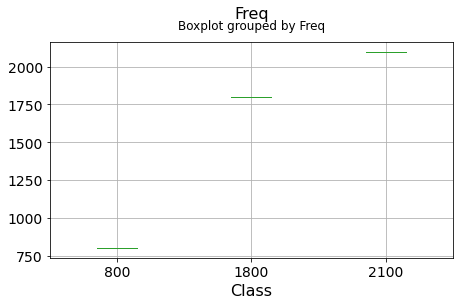

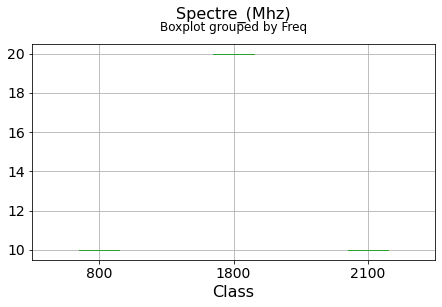

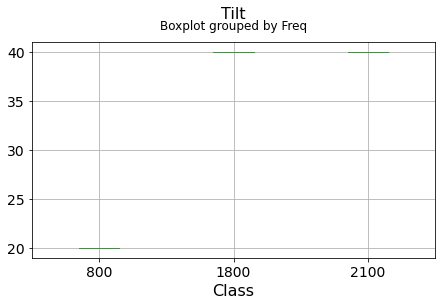

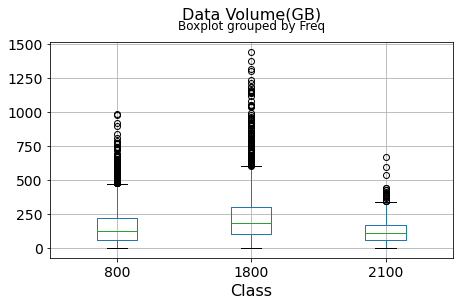

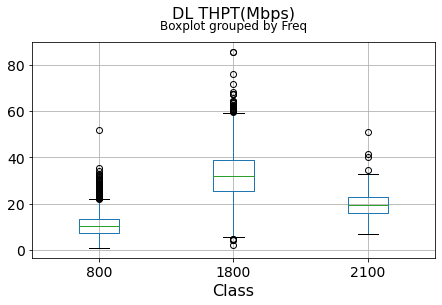

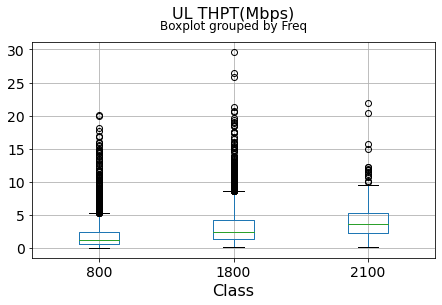

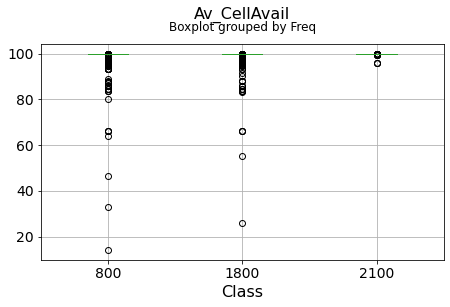

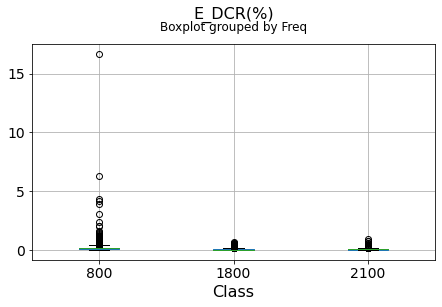

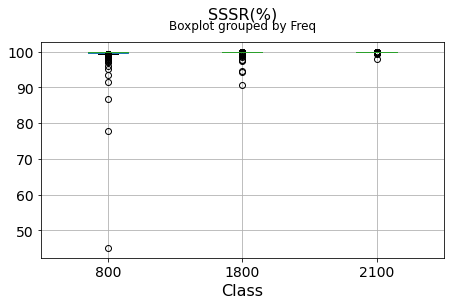

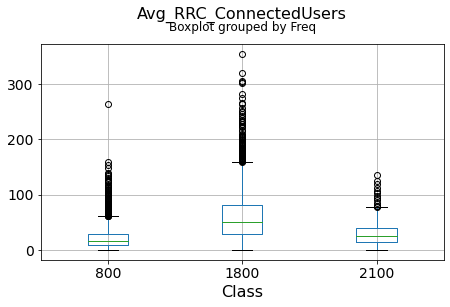

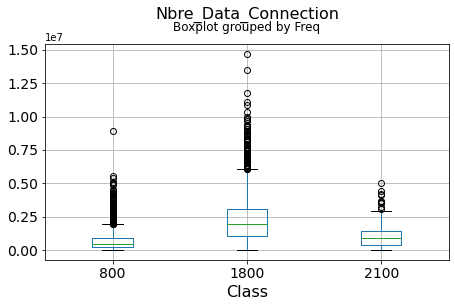

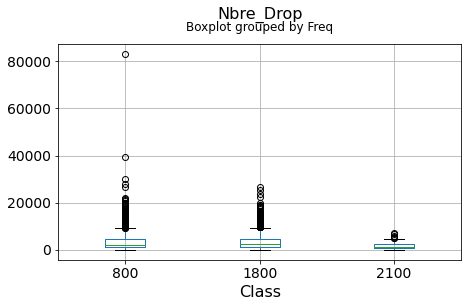

In [ ]:
for c in Dataset_merged_num.columns[1:]:
    Dataset_merged_num.boxplot(c,by='Freq',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Class", fontsize=16)

No handles with labels found to put in legend.


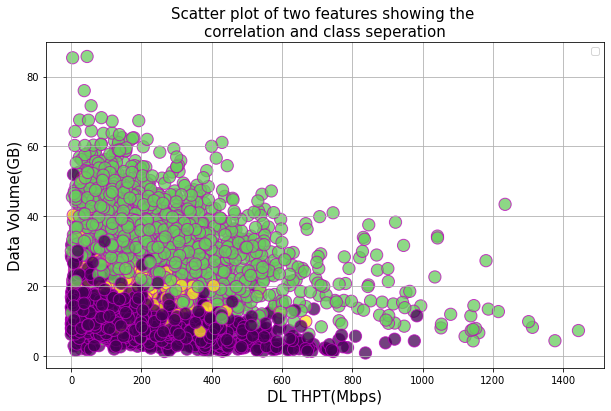

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(Dataset_merged_num['Data Volume(GB)'],Dataset_merged_num['DL THPT(Mbps)'],c=Dataset_merged_num['Freq'],edgecolors='M',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("DL THPT(Mbps)",fontsize=15)
plt.ylabel("Data Volume(GB)",fontsize=15)
plt.legend()
plt.show()

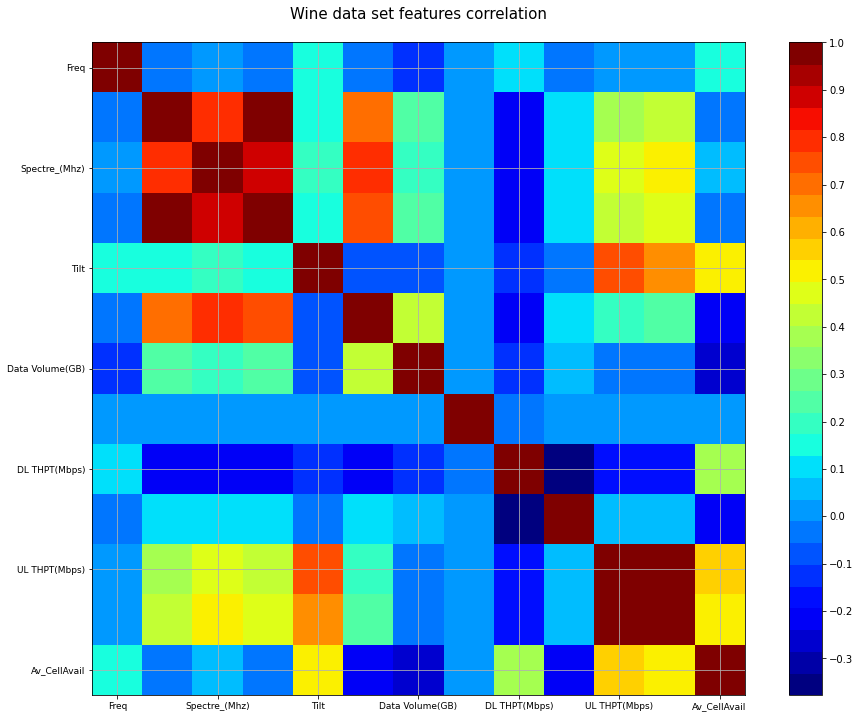

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(Dataset_merged_num)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(Dataset_merged_num)
#dfx = pd.DataFrame(data=X,columns=Dataset_merged_num.columns[1:])
dfx = pd.DataFrame(data=X,columns=Dataset_merged_num.columns[0:])
dfx.head(10)


,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,-1.282214,-1.049772,-0.922986,-1.060282,-0.820100,-0.433214,-0.744609,0.099746,-0.210138,-0.098995,-0.891099,-0.864549,-0.805938
1,-1.282214,-1.049772,-0.922986,-1.060282,0.386083,-0.708190,-0.437902,0.099746,-0.243564,-0.098995,-0.312758,-0.477547,-0.309656
2,-1.282214,-1.049772,-0.922986,-1.060282,-0.382818,-0.044611,1.769673,0.099746,-0.109860,-1.324004,-0.886932,-0.918785,-0.882521
3,-1.282214,0.858905,1.083440,0.943145,-1.018355,0.777289,-0.819502,0.099746,-0.210138,0.127859,-0.740590,-0.608147,-0.702219
4,-1.282214,0.858905,1.083440,0.943145,-0.351954,0.916670,-0.566291,0.099746,-0.310415,0.139201,0.372605,0.594283,-0.200510
5,-1.282214,0.858905,1.083440,0.943145,-0.632531,1.292396,0.949411,0.099746,-0.377267,0.093831,0.125749,0.257691,-0.590963
6,0.146314,-1.049772,-0.922986,-1.060282,-0.462931,-0.465029,0.439422,0.084761,0.023843,-0.076310,-0.787721,-0.875679,-0.761616
7,0.146314,-1.049772,-0.922986,-1.060282,-0.162177,-0.425638,0.974376,0.084761,-0.143286,-0.098995,-0.688510,-0.791763,-0.769757
8,0.146314,-1.049772,-0.922986,-1.060282,-0.874306,-0.465786,-0.516362,0.084761,-0.109860,0.059803,-0.931721,-0.904343,-0.875586
9,0.146314,0.858905,1.083440,0.943145,-0.675573,0.250061,0.207609,0.084761,-0.343841,0.093831,0.219752,0.346983,-0.557194


In [ ]:
dfx.describe()


,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
count,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03,5.302000e+03
mean,4.017073e-16,3.245193e-15,1.334278e-16,-7.843594e-16,-1.033374e-16,1.235442e-16,2.937840e-17,8.790696e-16,-1.087860e-16,-3.195714e-14,-6.424170e-17,2.105016e-16,1.981315e-16
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-3.067874e+00,-1.049772e+00,-9.229862e-01,-1.060282e+00,-1.140914e+00,-1.552814e+00,-9.835545e-01,-3.205720e+01,-4.106931e-01,-6.209806e+01,-1.049680e+00,-9.642476e-01,-9.964906e-01
25%,-7.465157e-01,-1.049772e+00,-9.229862e-01,-1.060282e+00,-6.956614e-01,-8.309066e-01,-6.625823e-01,9.599950e-02,-2.769896e-01,-3.093885e-02,-7.056314e-01,-7.093592e-01,-6.364150e-01
50%,2.727033e-02,8.589046e-01,-9.229862e-01,9.431450e-01,-2.565579e-01,-2.358820e-01,-3.202121e-01,9.974565e-02,-1.767120e-01,8.248790e-02,-3.058579e-01,-3.356470e-01,-2.796559e-01
75%,2.058363e-01,8.589046e-01,1.083440e+00,9.431450e-01,3.929038e-01,7.271034e-01,3.145995e-01,9.974565e-02,5.726907e-02,1.505440e-01,4.033967e-01,3.992832e-01,3.373044e-01
max,6.455647e+00,1.431508e+00,1.083440e+00,9.431450e-01,7.473585e+00,4.876936e+00,9.590695e+00,9.974565e-02,5.537708e+01,2.186000e-01,8.203244e+00,8.925017e+00,2.409047e+01


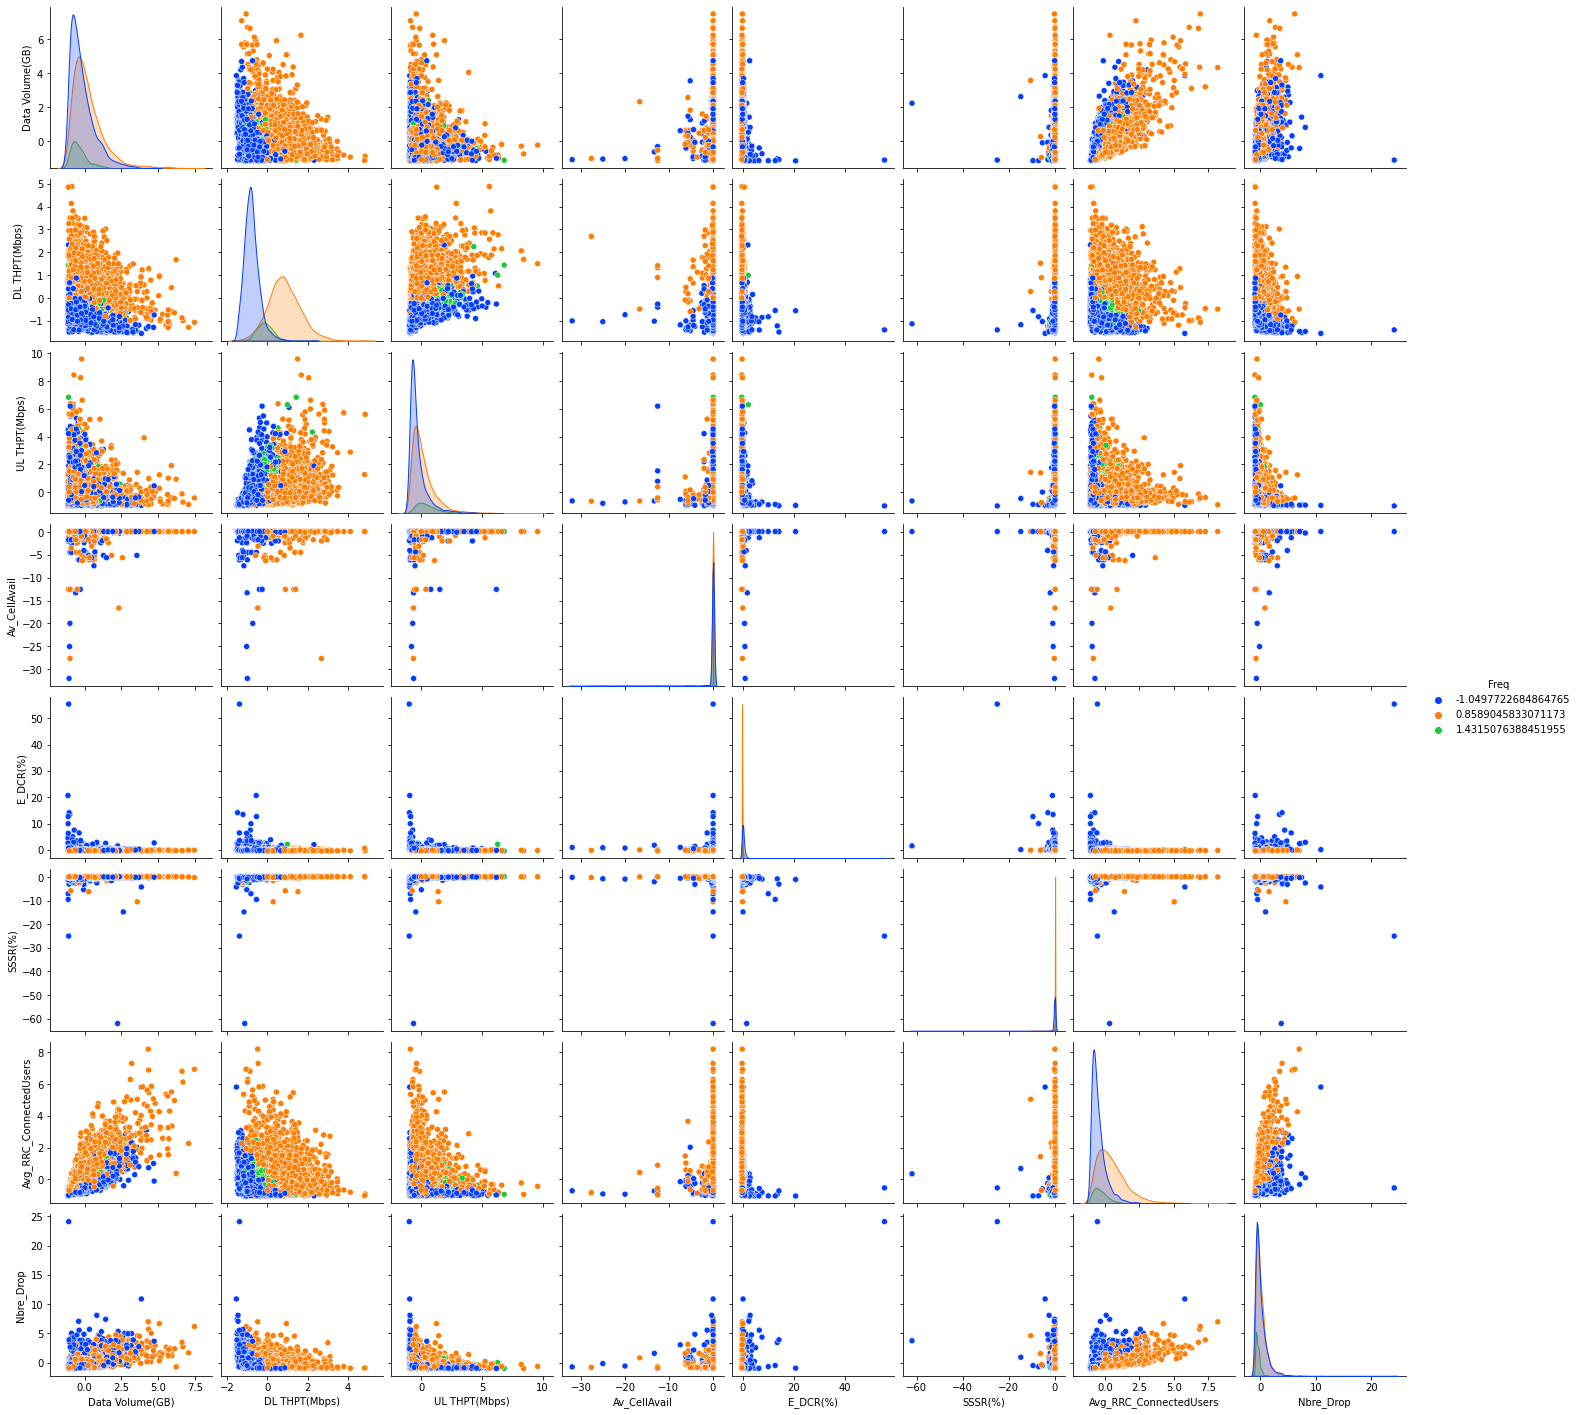

In [ ]:
sns.pairplot(dfx, vars=[   'Data Volume(GB)', 'DL THPT(Mbps)', 'UL THPT(Mbps)', 'Av_CellAvail', 'E_DCR(%)', 'SSSR(%)', 'Avg_RRC_ConnectedUsers', 'Nbre_Drop'], 
             hue="Freq", palette='bright')
             #hue="Freq", palette='bright')
sns.despine()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx.iloc[:1070,:])


In [ ]:
dfx.iloc[1070:1079,:].head(10)

,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
1070,0.503651,-1.049712,-0.923070,-1.060212,-0.889098,-0.744685,-0.744840,0.099689,-0.243564,-0.167284,-0.841363,-0.687738,-0.502260
1071,0.503651,0.859051,1.083341,0.943208,-0.628308,2.973452,3.667107,0.099689,-0.343841,0.139138,-0.703093,-0.649864,-0.901264
1072,0.503651,0.859051,1.083341,0.943208,-0.518366,2.079130,0.738887,0.099689,-0.343841,0.105091,-0.468475,-0.450295,-0.775501
1073,0.503651,0.859051,1.083341,0.943208,0.406376,0.881905,0.071923,0.099689,-0.243564,0.150487,-0.143761,-0.130594,-0.384640
1074,0.146320,-1.049712,-0.923070,-1.060212,-0.959805,-0.807537,-0.794773,0.099689,NaN,0.025649,NaN,-0.641536,-0.844263
1075,0.146320,-1.049712,-0.923070,-1.060212,-0.813316,-0.781790,-0.694907,0.099689,NaN,0.139138,NaN,-0.407264,-0.689849
1076,-0.091900,-1.049712,-0.923070,-1.060212,-0.547210,-1.018055,-0.773373,0.099689,NaN,0.105091,NaN,-0.237203,-0.628023
1077,0.146320,0.859051,1.083341,0.943208,0.210558,1.766383,1.020652,0.099689,NaN,0.150487,NaN,0.112026,-0.845771
1078,0.146320,0.859051,1.083341,0.943208,0.162127,1.440762,1.263184,0.099689,NaN,0.173185,NaN,0.387909,-0.781231


In [ ]:
dfx.isna().sum().sum()


12

In [ ]:
dfx[dfx.isna().any(axis=1)]


,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
1074,0.14632,-1.049712,-0.923070,-1.060212,-0.959805,-0.807537,-0.794773,0.099689,NaN,0.025649,NaN,-0.641536,-0.844263
1075,0.14632,-1.049712,-0.923070,-1.060212,-0.813316,-0.781790,-0.694907,0.099689,NaN,0.139138,NaN,-0.407264,-0.689849
1076,-0.09190,-1.049712,-0.923070,-1.060212,-0.547210,-1.018055,-0.773373,0.099689,NaN,0.105091,NaN,-0.237203,-0.628023
1077,0.14632,0.859051,1.083341,0.943208,0.210558,1.766383,1.020652,0.099689,NaN,0.150487,NaN,0.112026,-0.845771
1078,0.14632,0.859051,1.083341,0.943208,0.162127,1.440762,1.263184,0.099689,NaN,0.173185,NaN,0.387909,-0.781231
1079,-0.09190,0.859051,1.083341,0.943208,0.524021,1.428646,0.881553,0.099689,NaN,0.150487,NaN,0.606140,-0.447069


In [ ]:
dfxx=dfx.dropna().reset_index(drop=True)

In [ ]:
dfxx[dfxx.isna().any(axis=1)]


,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop


no NaN values id Dataframe

In [ ]:

pca = PCA()
df_pca=pca.fit(dfxx)

Variance expliquée
L'objet pca comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.41872099e+00 2.70137738e+00 1.36776014e+00 1.00754581e+00
 9.95362341e-01 8.42512429e-01 6.60517440e-01 3.26223824e-01
 2.93696892e-01 2.54905330e-01 1.35652987e-01 3.25599947e-03
 6.69653435e-31]
[3.39704806e-01 2.07677941e-01 1.05151399e-01 7.74586480e-02
 7.65220008e-02 6.47711232e-02 5.07796146e-02 2.50796104e-02
 2.25789874e-02 1.95967489e-02 1.04288032e-02 2.50316476e-04
 5.14819765e-32]


Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [ ]:
dfxx.shape

(5302, 13)

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dfxx.shape

(5302, 13)

In [ ]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(13)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig.head(17)

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,4.418721e+00,34.0,34.0
1,Dim2,2.701377e+00,21.0,55.0
2,Dim3,1.367760e+00,11.0,65.0
3,Dim4,1.007546e+00,8.0,73.0
4,Dim5,9.953623e-01,8.0,81.0
5,Dim6,8.425124e-01,6.0,87.0
6,Dim7,6.605174e-01,5.0,92.0
7,Dim8,3.262238e-01,3.0,95.0
8,Dim9,2.936969e-01,2.0,97.0
9,Dim10,2.549053e-01,2.0,99.0


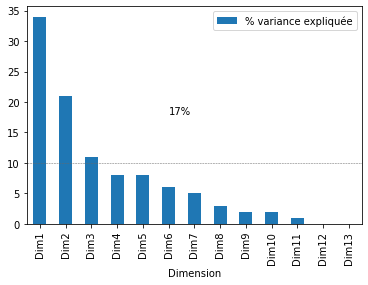

In [ ]:
eig.head(17).plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 98 (nb dimensions)
plt.show()

In [ ]:
dfx_pca = df_pca


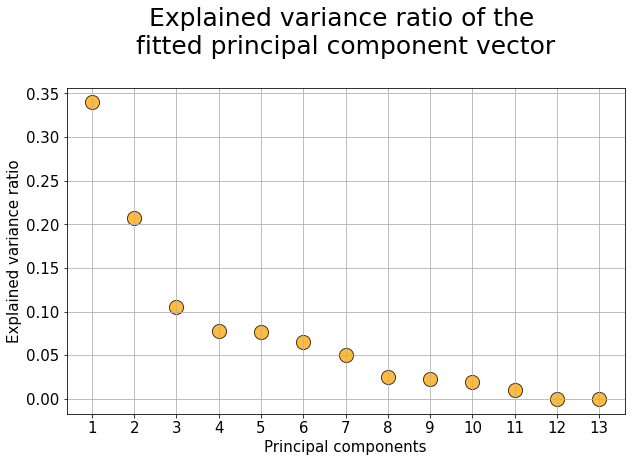

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

On remarque en appliquant la règle de Kaiser on retient deux axes pour expliquer les variances des données.



**Représentation des individus**

Nous allons maintenant calculer les coordonnées des sites sur les dimensions, avec la fonction transform() de l'objet pca.

In [ ]:
pca.transform(dfxx)
df_pca=pd.DataFrame(pca.transform(dfxx))

In [ ]:
#dfy_pca = pca.transform(pd.DataFrame(data=df_pca))
#"principalComponents = pca.fit_transform(x)
dfxx_pca = pd.DataFrame(pca.transform(dfxx))
dfxx_pca.iloc[:,0:2]



,0,1
0,2.375209,-0.662755
1,1.749261,0.415445
2,1.980633,-1.160171
3,-0.616729,-1.967942
4,-1.753355,-0.790492
...,...,...
5297,1.968333,-0.931339
5298,1.767807,-1.153449
5299,-1.485198,-1.648821
5300,-0.479950,-1.552692


#Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons créer un DataFrame pandas en ne prenant que les deux premières dimensions, ainsi que les cellules radio.

In [ ]:
dfxx.shape

(5302, 13)

In [ ]:
dfxx_pca.shape

(5302, 13)

In [ ]:
dfxx.head()


,HBA,Freq,Spectre_(Mhz),Tilt,Data Volume(GB),DL THPT(Mbps),UL THPT(Mbps),Av_CellAvail,E_DCR(%),SSSR(%),Avg_RRC_ConnectedUsers,Nbre_Data_Connection,Nbre_Drop
0,-1.283002,-1.049712,-0.923070,-1.060212,-0.820124,-0.433452,-0.744840,0.099689,-0.210138,-0.099190,-0.891099,-0.864909,-0.805358
1,-1.283002,-1.049712,-0.923070,-1.060212,0.386489,-0.708336,-0.438108,0.099689,-0.243564,-0.099190,-0.312758,-0.477731,-0.308941
2,-1.283002,-1.049712,-0.923070,-1.060212,-0.382685,-0.044978,1.769649,0.099689,-0.109860,-1.324880,-0.886932,-0.919170,-0.881962
3,-1.283002,0.859051,1.083341,0.943208,-1.018449,0.776647,-0.819740,0.099689,-0.210138,0.127789,-0.740590,-0.608390,-0.701611
4,-1.283002,0.859051,1.083341,0.943208,-0.351811,0.915982,-0.566507,0.099689,-0.310415,0.139138,0.372605,0.594588,-0.199766


In [ ]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : dfxx_pca.iloc[:,0:1], 
    "Dim2" : dfxx_pca.iloc[:,1:2],
    #"Gouvernorat" : Dataset_merged["Gouvernorat"],
    "Site" : Dataset_merged["Site"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

ValueError: ignored

Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

In [ ]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (65%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (8 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (91%)") # titre général
plt.show()

Dans ce même graphique, on veut repérer les individus aux extrêmes. Ci-dessous, nous affichons donc les noms des pays ayant des valeurs absolues élevées pour chaque composante.

In [ ]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 1.5) | (abs(k[1]['Dim2']) > 1.5 ):
        ax.annotate(k[1]["Sites"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (56%)") 
plt.ylabel("Dimension 2 (8 %)")
plt.suptitle("Premier plan factoriel (65%)")
plt.show()

**Représentation des variables**

Lorsqu'on réalise une ACP, surtout dans un contexte exploratoire (et non de compression), il est absolument nécessaire de décrire les axesà partir des variables, afin de comprendre ce qu'ils représentent. Pour cela, nous devons réaliser le cercle des corrélations. Malheureusement, il faut le réaliser à la main.

In [ ]:
n = Dataset_merged_num.shape[0] # nb individus
p = Dataset_merged_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pandas.DataFrame({'id': Dataset_merged_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.



In [ ]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

      B) Statistiques descriptives


In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
dataset=data[["HBA","Taux_de_blocage","Taux_de_coupure", "Trafic_(Go)", "Disponibility_Rate", "ULRSSI",
       "User_Info", "Debit_AVG_BH"]]


In [ ]:
dataset.head()

In [ ]:
dataset.describe()


In [ ]:
dataset.nunique()


In [ ]:
dataset.isnull().sum()

In [ ]:
import seaborn as sb
ig,axis = plt.subplots(figsize=(10,10))
axis = sb.heatmap(data=Dataset_merged_num.head(30).corr(method='pearson',min_periods=1),annot=True,cmap="gray")

In [ ]:
#data.Top_Worst\r.value_counts()
data.Top_Worst\r.value_counts()
plt.figure(figsize=(12, 8))
exited_plot = sns.countplot(x=data.Top_Worst\r)
exited_plot.set_title('Count for each class of exited customer',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['1', '0'], fontsize=20)

In [ ]:
dataset.info()

In [ ]:
f, ax = plt.subplots(figsize=(18,12))  #Width,height

corr = dataset.corr()
#sns.heatmap(corr, cmap = 'coolwarm')
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

In [ ]:
cat_names = data.select_dtypes(exclude=np.number).columns.tolist()
#cat_names.remove('Surname')
cat_names

In [ ]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(data['Top_Worst\r'],data[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

      C) Boîte à moustaches


In [ ]:
import seaborn as sns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
numerical_labels = [['Age', 'CreditScore'], 
                    ['Tenure', 'Balance'],
                   ['NumOfProducts', 'EstimatedSalary']]
num_colors = [['Set1', 'Set2'], 
              ['Set3', 'PuRd'],
              ['Spectral', 'Wistia']]
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        feature = numerical_labels[i][j]
        color = num_colors[i][j]
        ax1 = sns.boxplot(x='Exited', y=feature, palette=color, data=data, ax=ax[i][j])
        ax1.set_xlabel('Exited', labelpad=10)
        ax1.set_xticklabels(['No', 'Yes'])
sns.despine()
# this prevents plots from overlapping
plt.tight_layout()

      D) Nuage de points


In [ ]:
data.head()

In [ ]:
sns.pairplot(data, vars=['Taux_de_blocage', 'Taux_de_coupure', 'BalaTrafic_(Go)', 'Disponibility_Rate'], 
             hue="Top_Worst\r", palette='bright')
sns.despine()


      E) Variables d'entrée et cible avec l'utilisation de iloc (X/Y)


In [ ]:
x = data.iloc[:,15:22]
y = data.iloc[:,22]

print(x.shape)
print(y.shape)

#print(x.columns)
print(y)

      F) Encodage des données catégorielles


In [ ]:
x = pd.get_dummies(x)

x.head()

In [ ]:
x.shape

      G) Fractionnement de l'ensemble de données en ensembles de train et de test


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,shuffle=True, stratify=y, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

      H) Mise à l'échelle des fonctionnalités (feature scaling)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

In [ ]:
amount_retained = data[data['Top_Worst\r'] == 0]['Top_Worst\r'].count() / data.shape[0] * 100
amount_lost = data[data['Top_Worst\r'] == 1]['Top_Worst\r'].count() / data.shape[0] * 100

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='Top_Worst\r', palette="Set3", data=data)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()

In [ ]:
dataset.info

In [ ]:
   # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(x='Gouvernorat', hue = 'Top_Worst\r',data = data, ax=axarr[0][0])
#sns.countplot(x='Gender', hue = 'Top_Worst\r',data = data, ax=axarr[0][1])
#sns.countplot(x='HasCrCard', hue = 'Top_Worst\r',data = data, ax=axarr[1][0])
#sns.countplot(x='IsActiveMember', hue = 'Top_Worst\r',data = data, ax=axarr[1][1])

2. Utilisation du k Voisins les plus proches (KNN)


In [ ]:

from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
model_KNeighborsClassifier = KNeighborsClassifier(n_jobs=-1)
model_KNeighborsClassifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix

model_KNeighborsClassifier.fit(x_train, y_train)

y_pred = model_KNeighborsClassifier.predict(x_test)

print("Training Accuracy :", model_KNeighborsClassifier.score(x_train, y_train))
print("Testing Accuaracy :", model_KNeighborsClassifier.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_KNeighborsClassifier, x_test, y_test)  
plt.show()

3. Utilisation de l'Arbre de décision


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model_DecisionTree = DecisionTreeClassifier() 
model_DecisionTree.fit(x_train, y_train)

y_pred = model_DecisionTree.predict(x_test)

print("Training Accuracy :", model_DecisionTree.score(x_train, y_train))
print("Testing Accuaracy :", model_DecisionTree.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_DecisionTree, x_test, y_test)  
plt.show()

4. Utilisation du Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest = RandomForestClassifier() 
model_RandomForest.fit(x_train, y_train)

y_pred = model_RandomForest.predict(x_test)

print("Training Accuracy :", model_RandomForest.score(x_train, y_train))
print("Testing Accuaracy :", model_RandomForest.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_RandomForest, x_test, y_test)  
plt.show()

5. utilisation du Features selection


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest code here
selector = SelectKBest(f_classif, k=13)

selector_fit = selector.fit(x_train, y_train)

dfscores = pd.DataFrame(selector_fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  # imav 15, posto 

In [ ]:
# Sélection de fonctionnalités pour améliorer la construction de modèles
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(2, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(x, y)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, x.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

Features Importance

In [ ]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(x_train,y_train)

In [ ]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [data.columns[i] for i in indices-3]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(x.shape[1]),importances[indices],align = 'center')
plt.yticks(range(x.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

6. utilisation du SVM


In [ ]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM.fit(x_train, y_train)

y_pred = model_SVM.predict(x_test)

print("Training Accuracy :", model_SVM.score(x_train, y_train))
print("Testing Accuracy :", model_SVM.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(model_SVM, x_test, y_test)  
plt.show()

7. utilisation de la Régression logistique


In [ ]:
# Creating a function to create prediction model for Logistic Regression
def get_lr_model(y_train,X_train, X_test):
    model_LogisticRegression = LogisticRegression(max_iter=100000000)
    model_LogisticRegression.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model_LogisticRegression.coef_[0]]
    intercept = model_LogisticRegression.intercept_[0]
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model_LogisticRegression.intercept_)
    y_pred = model_LogisticRegression.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('Confusion Matrix from sklearn\n',confusion_matrix(y_test, y_pred))
    print('Accuracy Scores from sklearn:\n',accuracy_score(y_test, y_pred))
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    return model_LogisticRegression, arr, intercept

In [ ]:
# Function to plot confusion matrix
def confusion_matrix_plot(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()

In [ ]:
# Run logistic regression model
model_lr, arr, intercept = get_lr_model(y_train,x_train, x_test)

8. Tableau récapitulatif des différents résultats des différentes méthodes (Accuracy/Recall/Precision)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
y_pred = model_KNeighborsClassifier.predict(x_test)


In [ ]:
#Performance evaluation
def print_scores(model_KNeighborsClassifier, y_true, y_pred):
        print(model_KNeighborsClassifier)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_KNeighborsClassifier, y_test, y_pred)

In [ ]:
y_pred = model_SVM.predict(x_test)


In [ ]:
#Performance evaluation
def print_scores(model_SVM, y_true, y_pred):
        print(model_SVM)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_SVM, y_test, y_pred)

In [ ]:
y_pred = model_RandomForest.predict(x_test)


In [ ]:
#Performance evaluation
def print_scores(model_RandomForest, y_true, y_pred):
        print(model_RandomForest)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_RandomForest, y_test, y_pred)

In [ ]:
y_pred = model_DecisionTree.predict(x_test)


In [ ]:
#Performance evaluation
def print_scores(model_DecisionTree, y_true, y_pred):
        print(model_DecisionTree)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

print_scores(model_DecisionTree, y_test, y_pred)

In [ ]:
# Comparing performance of the 4 models

performance = {'Model': ['model_KNeighborsClassifier', 'model_SVM', 'model_RandomForest', 'model_DecisionTree','model_LogisticRegression'], 
               'Accuracy (%)': [0.82, 0.85, 0.86, 0.78,0.809], 
               'precision (%)': [0.617,0.828,0.768, 0.478,0.59], 
               'Recall (%)': [0.348, 0.343, 0.457, 0.5085,0.21]
              }
perf = pd.DataFrame(data=performance)
perf

9. Utilisation du courbe de ROC pour choisir le bon modèle à retenir.


In [ ]:
#define metrics
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV  
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve

model_SVM = SGDClassifier(loss='hinge',class_weight='balanced')
#by default, it fits a linear support vector machine (SVM)
model_SVM.fit(x_train, y_train)

y_test_pred = model_SVM.decision_function(x_test) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(test_fpr, test_tpr,  label='SVM')

y_pred_proba = model_DecisionTree.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, label='DecisionTree')

y_pred_proba = model_RandomForest.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr1,tpr1,label='RandomForest')


y_pred_proba = model_KNeighborsClassifier.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr3,tpr3,label='KNN')

y_pred_proba = model_lr.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr3,tpr3,label='model_lr')


plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

10. **Conclusion**
The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned 